<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install firebase-admin
import pandas as pd
import os 
import math
import cv2
import numpy as np 
import csv
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
import warnings

In [0]:
warnings.simplefilter('ignore')

In [0]:
import datetime
import firebase_admin
from firebase_admin import credentials
from firebase_admin import storage

# Fetch the service account key JSON file contents
cred = credentials.Certificate("credentials.json")

# Initialize the app with a service account, granting admin privileges
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'fir-4ca2c.appspot.com',
}, name='storage')

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
 
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont

In [0]:
#Loading E1 - Lenovo data : - sscb labels 
# until 14:43 - lenovo hold sscb photographs 
# 16:09 onwards - DTU Photographs 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imglenovo = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="lenovoinS" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
      blob.download_to_filename('/content/' + "lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      imglenovo.append("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg') 
      #print("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      ctr+=1
      print(ctr)


In [12]:
##Loading E2 - Mi data : 760 -- sscb labels 
# all SSCB photos 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgminote = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="minoteSSC" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgminote.append("minote" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
      
      

print(ctr)

minote2019-06-27 15:14:35.jpeg
minote2019-06-27 15:15:34.jpeg
minote2019-06-27 15:16:22.jpeg
minote2019-06-27 15:16:40.jpeg
minote2019-06-27 15:16:57.jpeg
minote2019-06-27 15:19:21.jpeg
minote2019-06-27 15:24:14.jpeg
minote2019-06-27 16:42:56.jpeg
minote2019-06-27 16:46:16.jpeg
minote2019-06-27 16:49:53.jpeg
minote2019-06-27 16:50:47.jpeg
minote2019-06-27 16:51:15.jpeg
minote2019-06-27 16:54:37.jpeg
minote2019-06-27 16:59:33.jpeg
minote2019-06-27 17:04:38.jpeg
minote2019-06-27 17:05:00.jpeg
minote2019-06-27 17:09:17.jpeg
minote2019-06-27 17:14:39.jpeg
minote2019-06-27 17:19:17.jpeg
minote2019-06-27 17:24:39.jpeg
minote2019-06-27 17:29:17.jpeg
minote2019-06-27 17:37:58.jpeg
minote2019-06-27 17:39:17.jpeg
minote2019-06-27 17:46:28.jpeg
minote2019-06-27 17:49:20.jpeg
minote2019-06-27 17:54:17.jpeg
minote2019-06-27 18:01:16.jpeg
minote2019-06-27 18:05:04.jpeg
minote2019-06-27 18:09:35.jpeg
minote2019-06-27 18:14:59.jpeg
minote2019-06-27 18:19:18.jpeg
minote2019-06-27 18:24:40.jpeg
minote20

In [13]:
bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgpb = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name.split('/')[1]=="rivers.jpg" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        print(blob.name)

        blob.download_to_filename('/content/' + "pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgpb.append("pb" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        print(ctr)

images/rivers.jpg/2019-07-03 12:46:45
pb2019-07-03 12:46:45.jpeg
1
images/rivers.jpg/2019-07-03 12:47:33
pb2019-07-03 12:47:33.jpeg
2
images/rivers.jpg/2019-07-03 12:48:16
pb2019-07-03 12:48:16.jpeg
3
images/rivers.jpg/2019-07-03 12:49:38
pb2019-07-03 12:49:38.jpeg
4
images/rivers.jpg/2019-07-03 12:50:40
pb2019-07-03 12:50:40.jpeg
5
images/rivers.jpg/2019-07-03 12:51:46
pb2019-07-03 12:51:46.jpeg
6
images/rivers.jpg/2019-07-03 12:52:29
pb2019-07-03 12:52:29.jpeg
7
images/rivers.jpg/2019-07-03 12:53:54
pb2019-07-03 12:53:54.jpeg
8
images/rivers.jpg/2019-07-03 12:54:57
pb2019-07-03 12:54:57.jpeg
9
images/rivers.jpg/2019-07-03 12:56:00
pb2019-07-03 12:56:00.jpeg
10
images/rivers.jpg/2019-07-03 12:57:00
pb2019-07-03 12:57:00.jpeg
11
images/rivers.jpg/2019-07-03 12:58:01
pb2019-07-03 12:58:01.jpeg
12
images/rivers.jpg/2019-07-03 12:58:16
pb2019-07-03 12:58:16.jpeg
13
images/rivers.jpg/2019-07-03 12:59:16
pb2019-07-03 12:59:16.jpeg
14
images/rivers.jpg/2019-07-03 13:01:35
pb2019-07-03 13:01:

In [15]:
print(len(imgminote))
print(len(imglenovo))
print(len(imgpb))


imgminote = np.reshape(imgminote,(826,1))
imglenovo = np.reshape(imglenovo,(829,1))
imgpb = np.reshape(imgpb,(483,1))


826
829
483


In [0]:
#Ready to stack into a common image 

images = np.vstack((imgminote,imglenovo, imgpb))

In [19]:
print(images)

[['minote2019-06-27 15:14:35.jpeg']
 ['minote2019-06-27 15:15:34.jpeg']
 ['minote2019-06-27 15:16:22.jpeg']
 ...
 ['pb2019-07-04 14:35:07.jpeg']
 ['pb2019-07-04 14:36:07.jpeg']
 ['pb2019-07-04 16:15:54.jpeg']]


In [23]:
im_trans=[]
im_ent=[]
im_cont=[]
im_read=[]

for img in images:
  print(img[0])  
  im = cv2.imread(img[0])
  im = cv2.resize(im,(128,128))
  im_read.append(im)
  im_trans.append(np.ndarray.flatten(transmission(im, retMean = False)))
  im_ent.append(entropy(im))
  im_cont.append(contrast(im))
  

minote2019-06-27 15:14:35.jpeg
minote2019-06-27 15:15:34.jpeg
minote2019-06-27 15:16:22.jpeg
minote2019-06-27 15:16:40.jpeg
minote2019-06-27 15:16:57.jpeg
minote2019-06-27 15:19:21.jpeg
minote2019-06-27 15:24:14.jpeg
minote2019-06-27 16:42:56.jpeg
minote2019-06-27 16:46:16.jpeg
minote2019-06-27 16:49:53.jpeg
minote2019-06-27 16:50:47.jpeg
minote2019-06-27 16:51:15.jpeg
minote2019-06-27 16:54:37.jpeg
minote2019-06-27 16:59:33.jpeg
minote2019-06-27 17:04:38.jpeg
minote2019-06-27 17:05:00.jpeg
minote2019-06-27 17:09:17.jpeg
minote2019-06-27 17:14:39.jpeg
minote2019-06-27 17:19:17.jpeg
minote2019-06-27 17:24:39.jpeg
minote2019-06-27 17:29:17.jpeg
minote2019-06-27 17:37:58.jpeg
minote2019-06-27 17:39:17.jpeg
minote2019-06-27 17:46:28.jpeg
minote2019-06-27 17:49:20.jpeg
minote2019-06-27 17:54:17.jpeg
minote2019-06-27 18:01:16.jpeg
minote2019-06-27 18:05:04.jpeg
minote2019-06-27 18:09:35.jpeg
minote2019-06-27 18:14:59.jpeg
minote2019-06-27 18:19:18.jpeg
minote2019-06-27 18:24:40.jpeg
minote20

In [24]:
print(len(im_trans))
print(len(im_cont))
print(len(im_ent))
print(len(images))

2138
2138
2138
2138


In [0]:
ctr=0
dict={}

for img in images:
  l=[]
  l.append(im_trans[ctr])
  l.append(im_cont[ctr])
  l.append(im_ent[ctr])
  dict[(img[0])]=l  
  ctr+=1

In [0]:
print(len(dict))
print(dict)

In [30]:
tmp=[]
for key in dict:
  temp=key[-24:-5]
  temp=temp.split('-')
  
  newtemp=temp[2].split(' ')
  
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  tmp.append(final)
  
  
print(len(tmp))

2138


In [0]:
##Modified timestamp with e,c,t

i=0
ecttime=[]
for key in dict:
  l=[]
  l.append(tmp[i])
  l.append(dict[key])
  ecttime.append(l)
  i+=1

In [0]:
##DROPPING NONE VALUES


df = pd.read_csv('/content/labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/labels_new.csv')


df_ = pd.read_csv('/content/labels_pb.csv')
data_ = df_.mask(df.eq('None')).dropna()
file_ = data_.to_csv('/content/labels_pb_new.csv')


In [0]:
k=0
cpcb=[]


with open('/content/labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>=3):
      l=[]
      l.append(row[2])
      l.append(row[4]) #PM
      l.append(row[3]) #RH
      cpcb.append(l)      

    
    

with open('/content/labels_pb_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>=3):
      l=[]
      l.append(row[2])
      l.append(row[4]) #PM
      l.append(row[3]) #RH
      cpcb.append(l)      

In [78]:
print(len(cpcb))
for ele in cpcb:
  print(ele)
  break


922
['27-06-2019 00:15', '61', '0.3']


In [0]:
final=[]
for e in ecttime:
  for tmp in cpcb:
    if(tmp[0] == e[0]):
      l=[]
      l.append(tmp[0])
      l.append(e[1])
      l.append(tmp[2])
      l.append(tmp[1])
      final.append(l)
      break


In [80]:
print(len(final))

1839


In [85]:
print(final[0])

['27-06-2019 15:15', [array([0.92156863, 0.92156863, 0.92156863, ..., 0.92941176, 0.92941176,
       0.91764706]), 56.17309332041681, 45.37183380126953], '0.3', '47']


In [0]:
#Feature engineering
hours=[]
trans=[]
cont=[]
ent=[]
rh=[]
pm=[]



for e in final:
  hours.append(float(e[0][-5:-3]))
  pm.append(float(e[3]))
  trans.append(e[1][0])
  ent.append(float(e[1][2]))
  cont.append(float(e[1][1]))
  rh.append(e[2])

In [0]:
print(len(hours))
print(hours)
print(len(trans))
# print(trans)
print(len(cont))
print(cont)
print(len(ent))
print(ent)
print(len(rh))
print(rh)
print(len(pm))
print(pm)

In [101]:
final_shape=len(hours)

hours = np.reshape(hours,(final_shape,1))
# trans = np.reshape(trans,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
pm = np.reshape(pm,(final_shape,1))
rh = np.reshape(rh,(final_shape,1))
features = np.hstack((hours, cont, ent, rh, trans))

print(features[0])


scaler = MinMaxScaler()

hours = scaler.fit_transform(hours)
trans = scaler.fit_transform(trans)
cont = scaler.fit_transform(cont)
ent = scaler.fit_transform(ent)
rh = scaler.fit_transform(rh)



features = np.hstack((hours, cont, ent,rh, trans))

print(features[0])

[0.6167729  0.82123357 0.         ... 0.92498022 0.9243013  0.91168485]
[0.6167729  0.82123357 0.         ... 0.92498022 0.9243013  0.91168485]


17.746820524775295
11.095374442984058


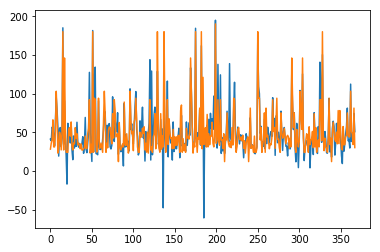

In [102]:
reg = LinearRegression(normalize =False)

x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.2, random_state =42)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_squared_error(pred, y_test)**0.5)
print(mean_absolute_error(pred, y_test))



In [96]:
shape = np.shape(pred)

pred = np.reshape(pred, shape)
y_test = np.reshape(y_test, shape)
result = np.hstack((pred, y_test))
print(result)


[[ 41.05146326  28.14      ]
 [ 38.51970725  35.77      ]
 [ 55.6582879   40.        ]
 [ 55.11632797  66.        ]
 [ 41.97103016  31.        ]
 [ 27.59870294  31.        ]
 [ 66.39971391  51.        ]
 [ 95.93184568 103.        ]
 [ 70.15449547  74.        ]
 [ 55.23157114  23.        ]
 [ 18.60392815  28.6       ]
 [ 53.6316534   50.        ]
 [ 54.72993991  46.        ]
 [ 30.63383134  27.12      ]
 [ 42.64791875  50.        ]
 [183.74838282 180.        ]
 [ 34.69963878  27.        ]
 [ 85.04035479 146.        ]
 [ 41.36007119  54.78      ]
 [ 20.24454023  24.27      ]
 [-37.60326604  24.        ]
 [ 58.03455867  24.        ]
 [ 44.73877768  53.        ]
 [ 54.25922036  56.        ]
 [ 39.11647428  45.        ]
 [ 63.06280785  63.28      ]
 [ 29.9087313   31.85      ]
 [ 14.95144625  27.        ]
 [ 45.36569658  36.        ]
 [ 28.97697804  35.        ]
 [ 44.43145017  56.        ]
 [ 35.34633538  42.31      ]
 [ 62.47213742  48.        ]
 [ 35.87350221  33.56      ]
 [ 31.09115543

In [97]:
print(max(np.diff(result)))
print(min(np.diff(result)))

[77.68355186]
[-96.4891861]


19.872478131165753
12.711242061916481


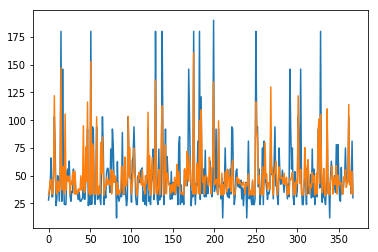

In [103]:
reg = RandomForestRegressor(max_depth=3)
reg.fit(x_train, y_train)
pred = reg.predict(x_test)


plt.plot(y_test)
plt.plot(pred)
print(mean_squared_error(pred, y_test)**0.5)
print(mean_absolute_error(pred, y_test))

In [100]:
k = (np.shape(pred))[0]
for i in range(0, ):
  print(str(y_test[i]) + '\t' + str(pred[i]))

[28.14]	28.94162238773908
[35.77]	41.49216874053427
[40.]	48.51734658940516
[66.]	44.606079191312155
[31.]	32.73764368679576
[31.]	32.73764368679576
[51.]	46.27721702324991
[103.]	108.33765047734501
[74.]	63.91468808954289
[23.]	39.962981969655495
[28.6]	29.773650469271757
[50.]	44.05988861071053
[46.]	44.05988861071053
[27.12]	35.38761701008873
[50.]	44.606079191312155
[180.]	144.2733802885167
[27.]	32.42848269217675
[146.]	76.67922283454908
[54.78]	42.077121621858986
[24.27]	29.773650469271757
[24.]	52.40683572597243
[24.]	33.533293070649776
[53.]	46.504620039143575
[56.]	44.03197129745367
[45.]	42.36540601104324
[63.28]	53.54171925369677
[31.85]	59.904140247837006
[27.]	35.277446243715175
[36.]	48.806219339905645
[35.]	38.87284745081687
[56.]	56.39395935716341
[42.31]	34.54867513901864
[48.]	69.56889422481912
[33.56]	29.773650469271757
[35.77]	35.38761701008873
[32.81]	32.73764368679576
[28.6]	39.6649165889938
[35.]	32.73764368679576
[27.]	32.42848269217675
[27.]	53.24880451167784
[